In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import logging

In [4]:
data = pd.read_csv('train.csv')
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [5]:
print(data.columns)
print('--------------------------------')
print(f'number of real clusters : {data['Credit_Score'].unique().shape}')#outputs the number of clusters we expect

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')
--------------------------------
number of real clusters : (3,)


In [6]:
logging.basicConfig(filename='app_log.txt',
                    level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

In [7]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
for col in data.columns:
    if data[col].isnull().sum() > 0:  # If the column has missing data
        data[col] = imputer.fit_transform(data[[col]])  # Fit and transform for this column
        logging.info(f'{col} had missing data and has been imputed.')
    else:
        logging.info(f'{col} has no missing data and was not imputed.')

In [8]:
data_c = data.copy()
data_c.drop(['Credit_Score','ID','Name','SSN','Credit_Mix','Payment_of_Min_Amount','Type_of_Loan'], axis=1, inplace=True)
data_c.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.46538,High_spent_Small_value_payments,312.494089
1,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.46538,Low_spent_Large_value_payments,284.629162
2,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863
3,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.46538,Low_spent_Small_value_payments,223.451310
4,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.46538,High_spent_Medium_value_payments,341.489231


In [9]:
ordenc = OrdinalEncoder()
data_c['Occupation'] = ordenc.fit_transform(data_c[['Occupation']])
data_c['Payment_Behaviour'] = ordenc.fit_transform(data_c[['Payment_Behaviour']])

array([[<Axes: title={'center': 'Customer_ID'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Occupation'}>,
        <Axes: title={'center': 'Annual_Income'}>],
       [<Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>],
       [<Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amo

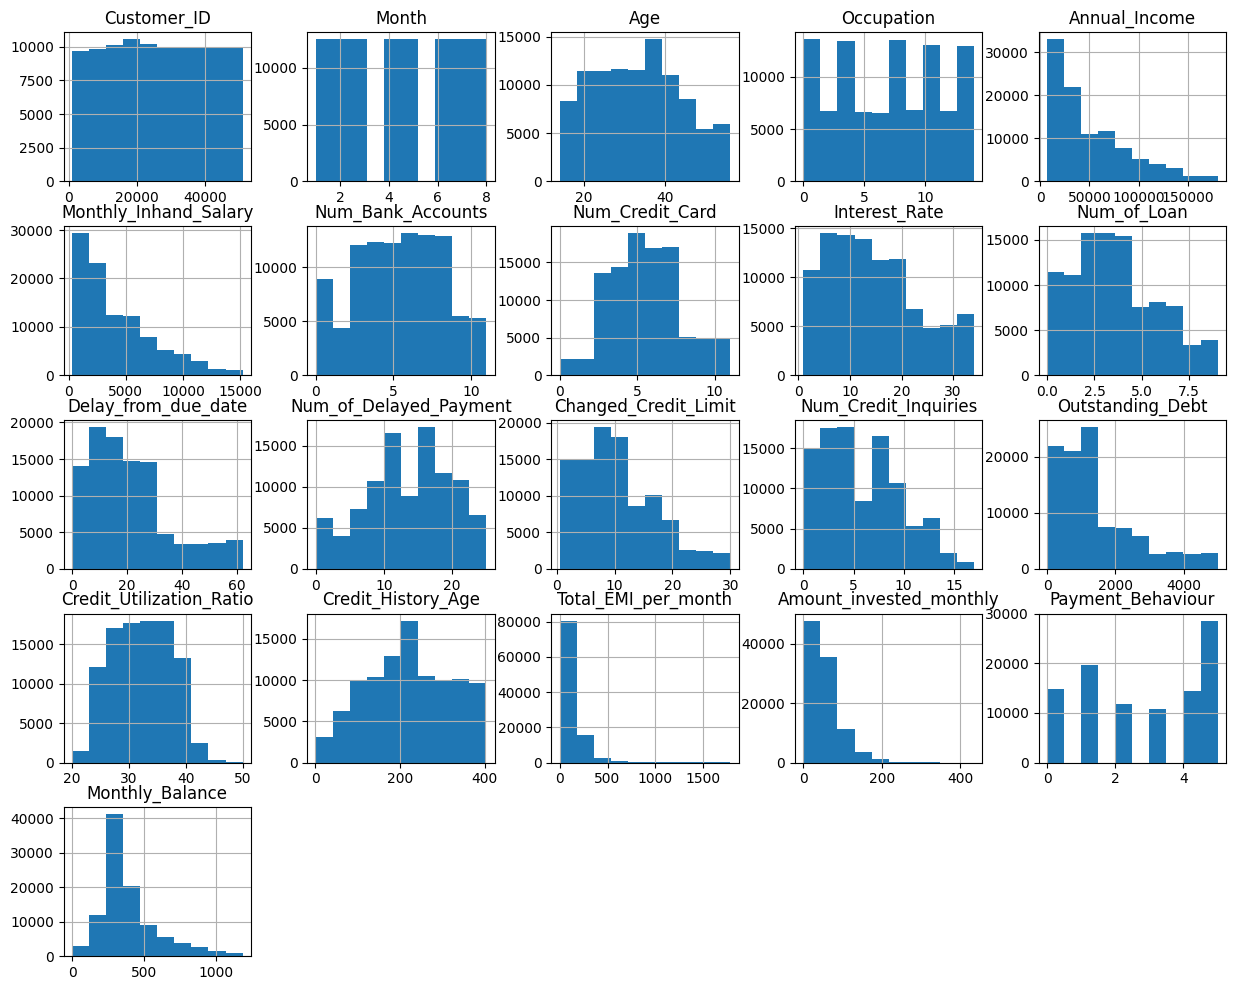

In [10]:
std_scaler = StandardScaler()
std_scaler.fit(data_c[['Occupation']])
data_c.hist(figsize=(15,12))